### Make Figures 5 and 6
Convergence of iterative algorithm on drug possession and misdemeanor under 35 semi-synthetic experiments. Before running this notebook, produce the summary metric csvs by running python3 run_baselines_on_semisynth.py model_type num_agents subset with the product of these arguments:
- model_type: Iterative, Direct
- num_agents: 2, 5, 10, 20, 40, 87
- subset: drug_possession, misdemeanor_under35

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product

In [24]:
def load_data(subset_name, iters_to_plot):
    assert subset_name in {'drug_possession', 'misdemeanor_under35'}
    all_df = None
    num_agents = [2, 5, 10, 20, 40, 87]
    n_iters_avg = dict()
    max_iter = 0
    secondary_classes = ['LogisticRegression', 'DecisionTree', 'RandomForest']
    secondary_classes_human_readable = {'LogisticRegression': 'ridge regression', 'DecisionTree': 'decision tree', \
                                        'RandomForest': 'random forest'}
    for n_agents, secondary_class in product(num_agents, secondary_classes):
        this_n_iters = np.zeros(10)
        for seed_iter in range(10):
            filedir = 'semisynth_logit15_' + subset_name + '_numagents' + str(n_agents)  + '_baselines/'
            filename = 'Iterative_' + secondary_class + '_iter' + str(seed_iter) + '_results.pkl'
            with open(filedir + filename, 'rb') as f:
                results_dict = pickle.load(f)
            if len(results_dict['iter_region_aucs']) > max_iter:
                max_iter = len(results_dict['iter_region_aucs'])
            this_n_iters[seed_iter] = len(results_dict['iter_region_aucs'])
            this_df = pd.DataFrame({'Num agents': [n_agents for i in range(iters_to_plot)], 
                                    'Region model': [secondary_classes_human_readable[secondary_class] \
                                                     for i in range(iters_to_plot)],
                                    'Iteration': range(iters_to_plot),
                                    'Region AUC': [results_dict['iter_region_aucs'][i] 
                                                   if i < len(results_dict['iter_region_aucs'])
                                                   else results_dict['iter_region_aucs'][-1] 
                                                   for i in range(iters_to_plot)],
                                    'Partition accuracy': [results_dict['iter_partition_accs'][i]
                                                           if i < len(results_dict['iter_partition_accs'])
                                                           else results_dict['iter_partition_accs'][-1]
                                                           for i in range(iters_to_plot)]})
            if all_df is None:
                all_df = this_df
            else:
                all_df = pd.concat((all_df, this_df), ignore_index=True)
        print(str(n_agents) + ' agents ' + secondary_class \
              + ' iterations to converge: {0:.1f}'.format(np.mean(this_n_iters)) \
              + ' ({0:.1f})'.format(np.std(this_n_iters)))
    print(max_iter)
    return all_df

In [25]:
drug_possession_df = load_data('drug_possession', 30)

2 agents LogisticRegression iterations to converge: 2.0 (0.0)
2 agents DecisionTree iterations to converge: 2.1 (0.3)
2 agents RandomForest iterations to converge: 2.1 (0.3)
5 agents LogisticRegression iterations to converge: 2.4 (0.7)
5 agents DecisionTree iterations to converge: 2.6 (0.5)
5 agents RandomForest iterations to converge: 2.6 (0.8)
10 agents LogisticRegression iterations to converge: 2.4 (0.5)
10 agents DecisionTree iterations to converge: 2.9 (0.8)
10 agents RandomForest iterations to converge: 3.0 (1.0)
20 agents LogisticRegression iterations to converge: 3.4 (0.7)
20 agents DecisionTree iterations to converge: 23.4 (38.3)
20 agents RandomForest iterations to converge: 22.5 (38.8)
40 agents LogisticRegression iterations to converge: 5.0 (1.3)
40 agents DecisionTree iterations to converge: 7.6 (2.9)
40 agents RandomForest iterations to converge: 7.9 (4.5)
87 agents LogisticRegression iterations to converge: 18.5 (27.7)
87 agents DecisionTree iterations to converge: 20.5 

In [26]:
misdemeanor_under35_df = load_data('misdemeanor_under35', 50)

2 agents LogisticRegression iterations to converge: 2.0 (0.0)
2 agents DecisionTree iterations to converge: 2.0 (0.0)
2 agents RandomForest iterations to converge: 2.0 (0.0)
5 agents LogisticRegression iterations to converge: 2.2 (0.4)
5 agents DecisionTree iterations to converge: 2.2 (0.4)
5 agents RandomForest iterations to converge: 2.2 (0.4)
10 agents LogisticRegression iterations to converge: 2.4 (0.5)
10 agents DecisionTree iterations to converge: 2.5 (0.5)
10 agents RandomForest iterations to converge: 2.6 (0.7)
20 agents LogisticRegression iterations to converge: 3.2 (0.9)
20 agents DecisionTree iterations to converge: 4.5 (2.0)
20 agents RandomForest iterations to converge: 3.9 (0.8)
40 agents LogisticRegression iterations to converge: 6.0 (2.4)
40 agents DecisionTree iterations to converge: 14.9 (28.4)
40 agents RandomForest iterations to converge: 35.4 (42.6)
87 agents LogisticRegression iterations to converge: 46.5 (43.9)
87 agents DecisionTree iterations to converge: 37.6 

In [44]:
def make_merged_convergence_plots(subset_name, iters_to_plot, tick_len):
    assert subset_name in {'drug_possession', 'misdemeanor_under35'}
    assert iters_to_plot > 1
    nrows = 3
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24,12), sharex=True, sharey=True)
    plt.rcParams.update({'font.size':18})
    num_agents = [10, 20, 40, 87]
    region_models = ['LogisticRegression', 'DecisionTree', 'RandomForest']
    region_model_readable = ['Ridge regression', 'Decision tree', 'Random forest']
    for row_idx, col_idx in product(range(nrows), range(ncols)):
        n_agents = num_agents[col_idx]
        region_model = region_models[row_idx]
        for seed_iter in range(10):
            filedir = 'semisynth_logit15_' + subset_name + '_numagents' + str(n_agents)  + '_baselines/'
            filename = 'Iterative_' + region_model + '_iter' + str(seed_iter) + '_results.pkl'
            with open(filedir + filename, 'rb') as f:
                results_dict = pickle.load(f)
            ax[row_idx, col_idx].plot(results_dict['iter_region_aucs'][:min(len(results_dict['iter_region_aucs']), 
                                                                            iters_to_plot+1)])
        ax[row_idx, col_idx].set_title(region_model_readable[row_idx] + ' region '+ str(n_agents) + ' agents')
        if row_idx == nrows - 1:
            ax[row_idx, col_idx].set_xlabel('Iteration')
        if col_idx == 0:
            ax[row_idx, col_idx].set_ylabel('Region AUC')
        ax[row_idx, col_idx].set_xticks(np.arange(iters_to_plot/tick_len+1)*tick_len)
    plt.tight_layout()
    plt.savefig(subset_name + '_all_semisynth_region_auc_convergence_indiv.pdf')
    plt.show()

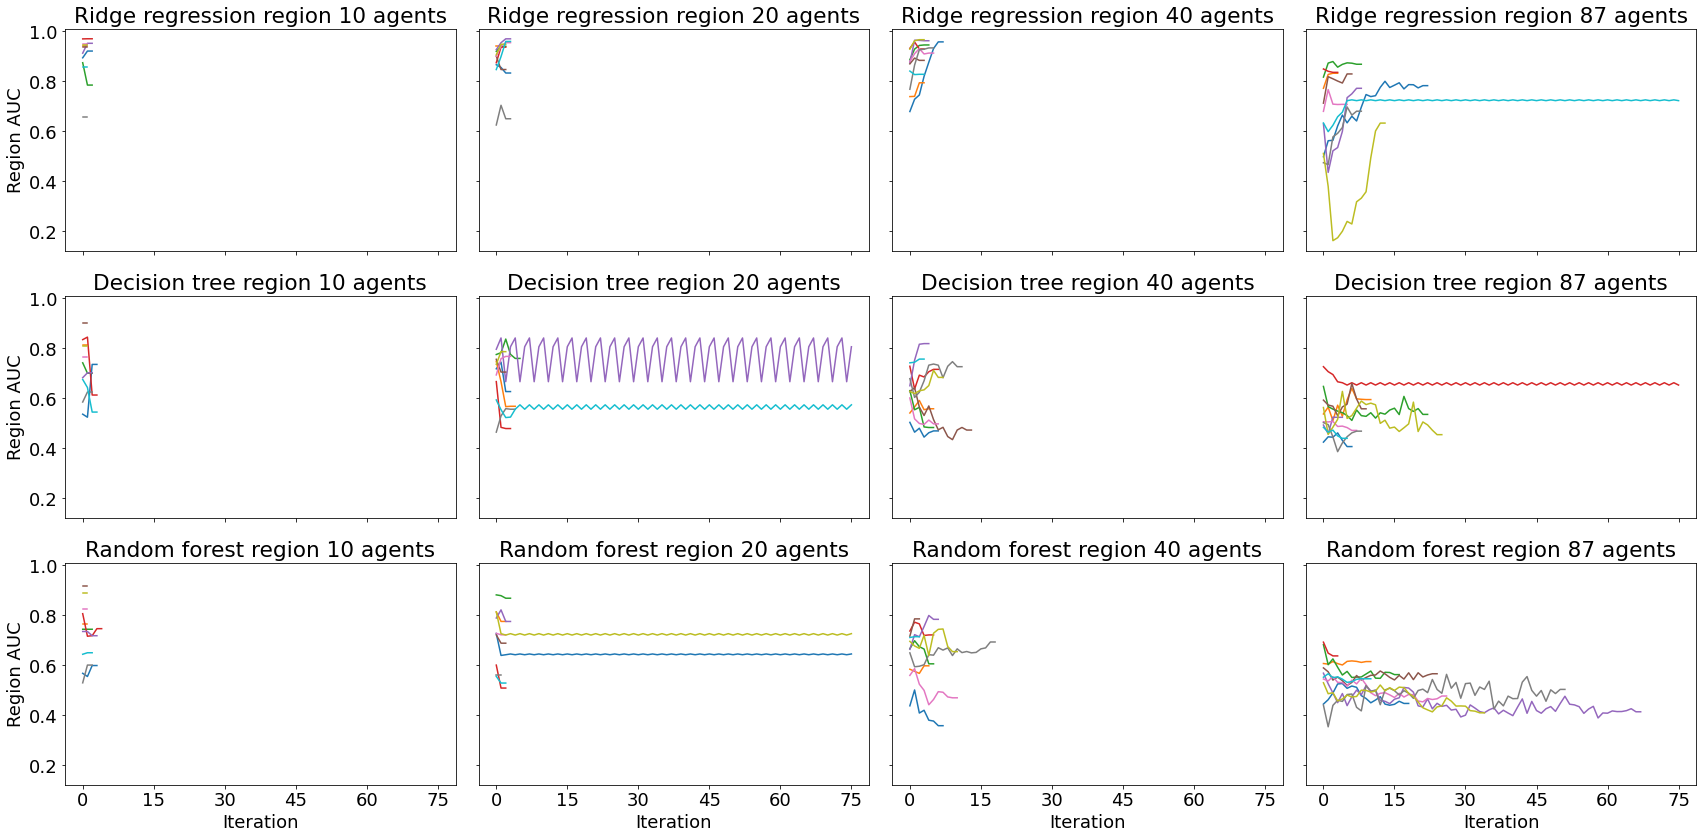

In [45]:
make_merged_convergence_plots('drug_possession', 75, 15)

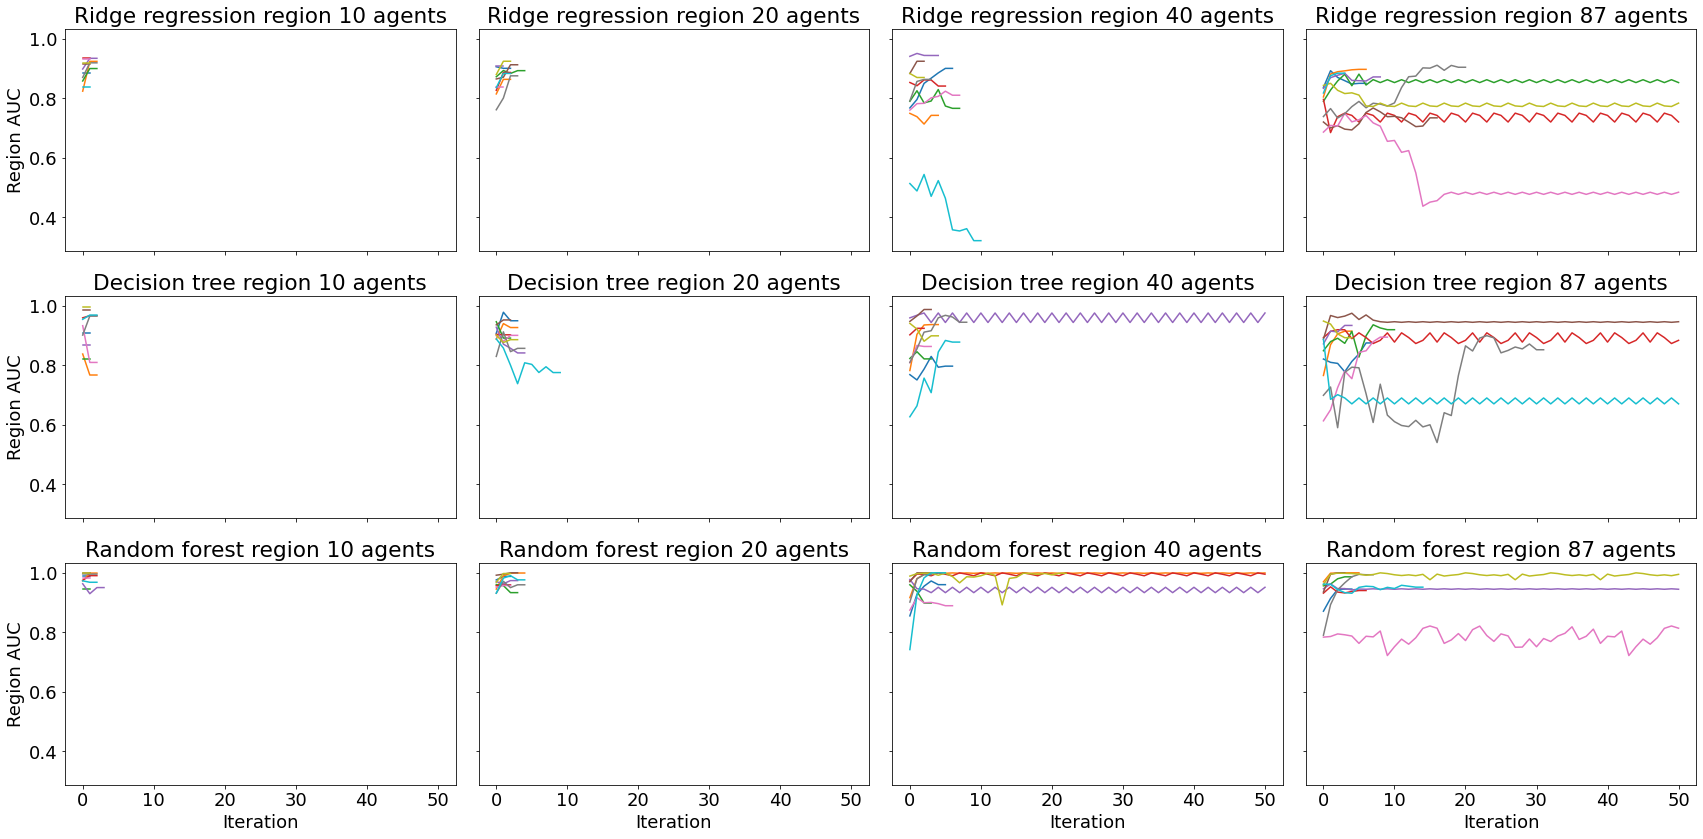

In [48]:
make_merged_convergence_plots('misdemeanor_under35', 50, 10)